In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nesarc = pd.read_csv('nesarc.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

# From Prac 1
# Columns/Data used in Prac 1

In [3]:
nesarc['S2AQ5B'] = pd.to_numeric(nesarc['S2AQ5B'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5D'] = pd.to_numeric(nesarc['S2AQ5D'], errors='coerce') #convert variable to numeric
nesarc['S2AQ5A'] = pd.to_numeric(nesarc['S2AQ5A'], errors='coerce') #convert variable to numeric
nesarc['S2BQ1B1'] = pd.to_numeric(nesarc['S2BQ1B1'], errors='coerce') #convert variable to numeric
nesarc['AGE'] = pd.to_numeric(nesarc['AGE'], errors='coerce') #convert variable to numeric

# From Prac 2
# A subset of nesarc data, with the following criteria
# Age from 26 to 50
# Beer drinking status - S2AQ5A = Y

In [4]:
sub1=nesarc[(nesarc['AGE']>=26) & (nesarc['AGE']<=50) & (nesarc['S2AQ5A']==1)]
sub2=sub1.copy()

# From Prac 2
# SETTING MISSING DATA

In [5]:
sub2['S2AQ5D']=sub2['S2AQ5D'].replace(99, np.nan)

sub2['S2AQ5B']=sub2['S2AQ5B'].replace(8, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(9, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(10, np.nan)
sub2['S2AQ5B']=sub2['S2AQ5B'].replace(99, np.nan)

sub2['S2BQ1B1']=sub2['S2BQ1B1'].replace(9, np.nan)

# From Prac 2
# Recode data

In [6]:
recode2 = {1:30, 2:26, 3:14, 4:8, 5:4, 6:2.5, 7:1}
sub2['BEER_FEQMO']= sub2['S2AQ5B'].map(recode2)

recode3 = {2:0, 1:1}
sub2['S2BQ1B1']= sub2['S2BQ1B1'].map(recode3)

# From Prac 2
# Create secondary variables

In [7]:
# A secondary variable multiplying the number of days beer consumed/month and the approx number of 
# beer consumed/day
sub2['NUMBEERMO_EST']=sub2['BEER_FEQMO'] * sub2['S2AQ5D']

# Draw a Line chart
# Age vs Number of beer consumed per month (NUMBEERMO_EST)

# a) mean number of beer consumed
# var = mean number of beers consumed a month, grouped by age

In [9]:
var = sub2.groupby(['AGE']).NUMBEERMO_EST.mean()
print(var)

AGE
26   23.701357
27   23.854545
28   30.035270
29   23.994949
30   24.170530
31   25.541033
32   25.678994
33   24.761017
34   23.143713
35   28.668478
36   26.813272
37   28.530387
38   26.414773
39   27.307122
40   31.571023
41   23.233788
42   31.877676
43   28.045455
44   37.279762
45   27.067241
46   31.727799
47   33.204918
48   33.655303
49   28.177778
50   28.995614
Name: NUMBEERMO_EST, dtype: float64


<IPython.core.display.Javascript object>


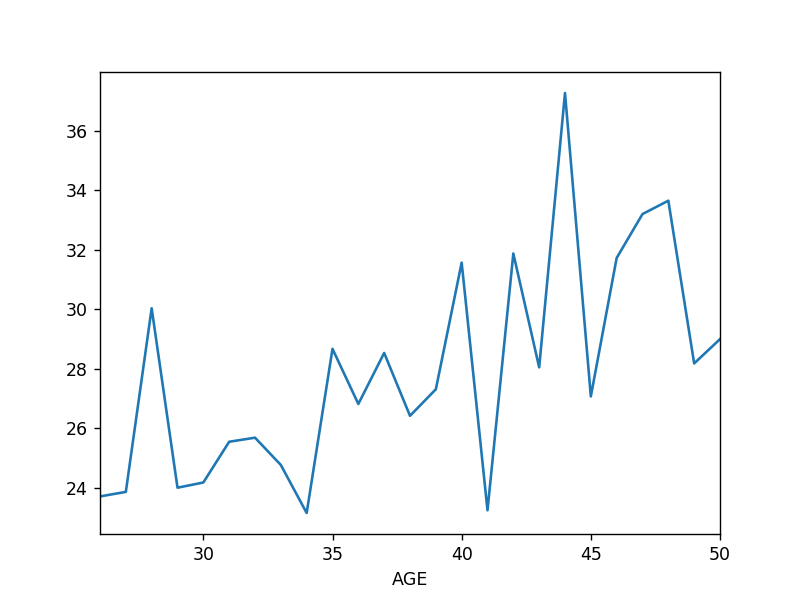

In [10]:
%matplotlib notebook
var.plot(kind='line')
#code for line chart

# b) total number of beer consumed
# var2 = sum number of beers consumed a month, grouped by age

In [11]:
var2 = sub2.groupby(['AGE']).NUMBEERMO_EST.sum()
print(var2)

AGE
26    5238.000000
27    6560.000000
28    7238.500000
29    7126.500000
30    7299.500000
31    8403.000000
32    8679.500000
33    7304.500000
34    7730.000000
35    7912.500000
36    8687.500000
37   10328.000000
38    9298.000000
39    9202.500000
40   11113.000000
41    6807.500000
42   10424.000000
43    8021.000000
44    9394.500000
45    7849.500000
46    8217.500000
47    8102.000000
48    8885.000000
49    6340.000000
50    6611.000000
Name: NUMBEERMO_EST, dtype: float64


<IPython.core.display.Javascript object>


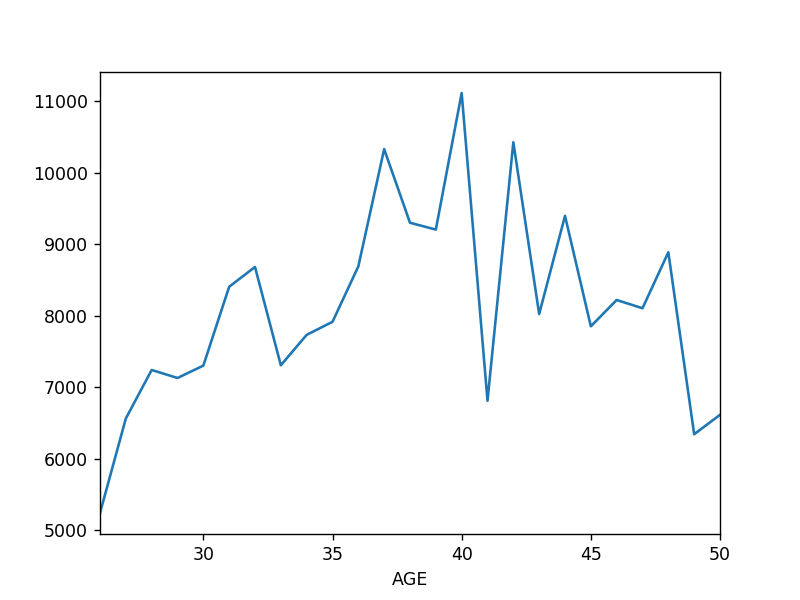

In [12]:
fig = plt.figure()
var2.plot(kind='line')
# code for line chart

# Draw a stacked Column Chart
# x = age (AGE)
# y = number of beers consumed per month (NUMBEERMO_EST)
# stack is based on depedency on beer (S2BQ1B1)

# var3 = mean number of beers consumed a month, grouped by age and beer depedency (S2BQ1B1)

In [37]:
var3 = sub2.groupby(['AGE','S2BQ1B1']).NUMBEERMO_EST.mean()
print(var3)

AGE  S2BQ1B1
26   0.00       21.45
     1.00       49.95
27   0.00       23.81
     1.00       24.35
28   0.00       26.02
     1.00       67.46
29   0.00       20.87
     1.00       44.08
30   0.00       21.53
     1.00       54.09
31   0.00       23.48
     1.00       55.11
32   0.00       23.87
     1.00       47.72
33   0.00       23.26
     1.00       45.08
34   0.00       21.73
     1.00       47.25
35   0.00       28.27
     1.00       32.38
36   0.00       24.37
     1.00       56.80
37   0.00       23.25
     1.00      101.24
38   0.00       24.27
     1.00       61.62
39   0.00       26.79
     1.00       41.72
40   0.00       30.58
     1.00       46.48
41   0.00       21.99
     1.00       44.44
42   0.00       30.56
     1.00       58.03
43   0.00       26.25
     1.00       49.64
44   0.00       34.89
     1.00       49.42
45   0.00       25.61
     1.00       48.08
46   0.00       30.04
     1.00       51.42
47   0.00       27.12
     1.00       97.45
48   0.00       28.

<IPython.core.display.Javascript object>


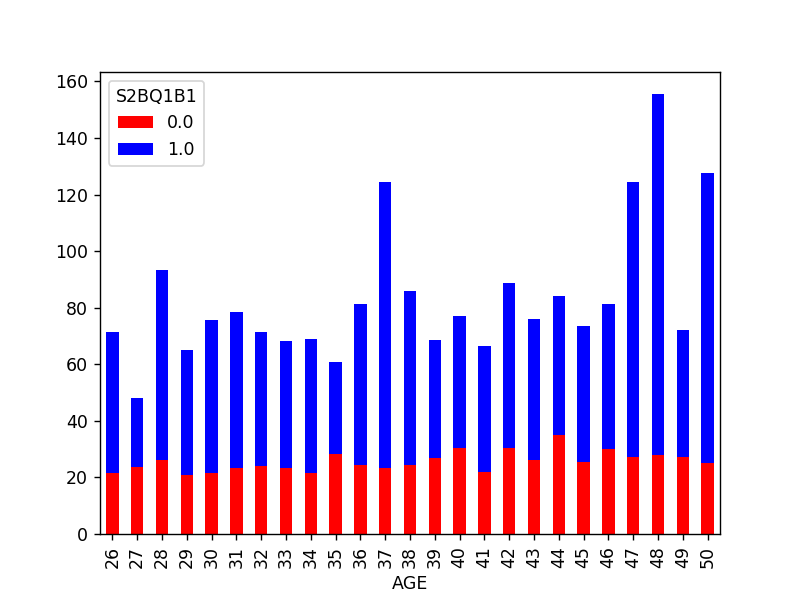

In [38]:
# code for vertical stack chart
var3.unstack().plot(kind='bar', stacked=True,  color=['red','blue'], grid=False)

# Draw a horizontal stacked Column Chart
# x = age (AGE)
# y = number of beers consumed per month (NUMBEERMO_EST)
# stack is based on depedency on  beer (S2BQ1B1)

<IPython.core.display.Javascript object>


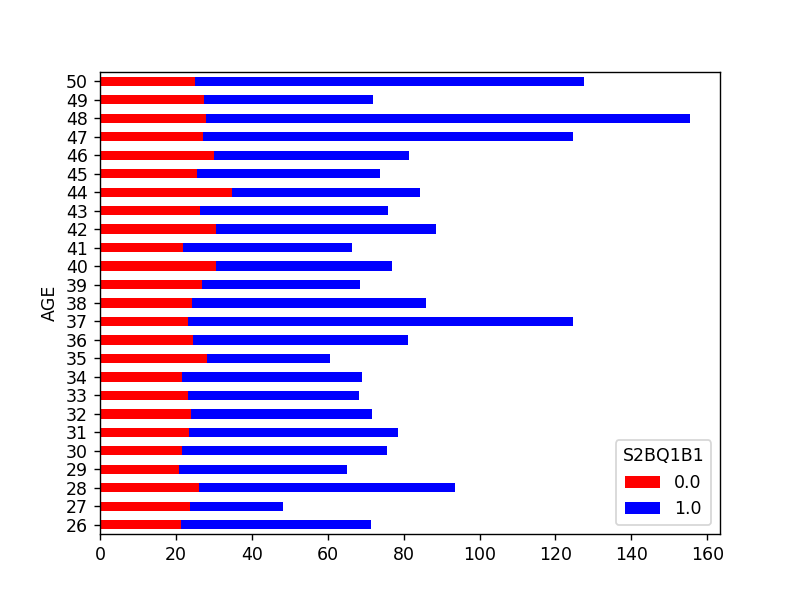

In [39]:
# code for horizontal stack chart
var3.unstack().plot(kind='barh', stacked=True,  color=['red','blue'], grid=False)

# Draw a Pie Chart showing age (AGE) and total beer consumed a month (NUMBEERMO_EST)
# hint use var2

In [40]:
print(var2)

AGE
26    5238.00
27    6560.00
28    7238.50
29    7126.50
30    7299.50
31    8403.00
32    8679.50
33    7304.50
34    7730.00
35    7912.50
36    8687.50
37   10328.00
38    9298.00
39    9202.50
40   11113.00
41    6807.50
42   10424.00
43    8021.00
44    9394.50
45    7849.50
46    8217.50
47    8102.00
48    8885.00
49    6340.00
50    6611.00
Name: NUMBEERMO_EST, dtype: float64


<IPython.core.display.Javascript object>


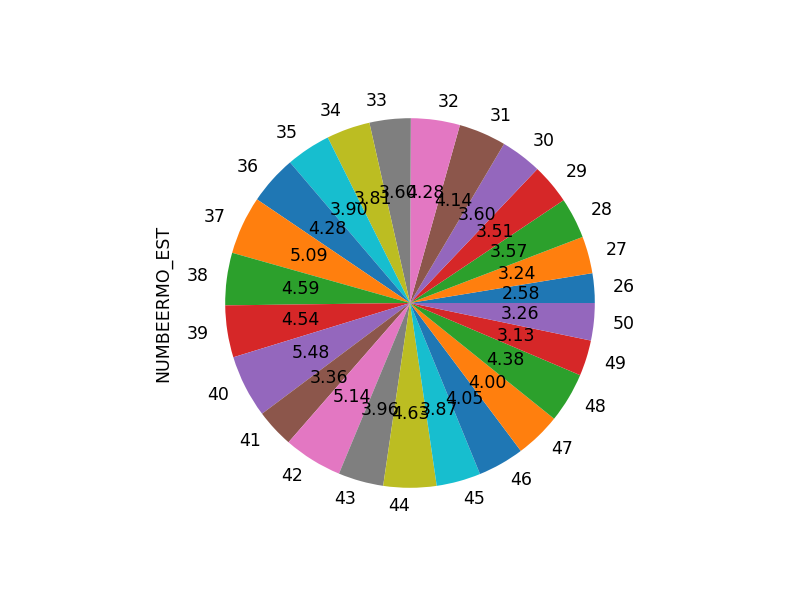

In [41]:
fig = plt.figure()

var2.plot(kind='pie',autopct='%.2f')
# code for pie chart

# Draw a Violin Plot for age (AGE) and income (S1Q10A)

# convert income (S1Q10A) to numeric

In [24]:
sub2['S1Q10A'] = pd.to_numeric(nesarc['S1Q10A']) #convert variable to numeric

# Plot violin plot

<IPython.core.display.Javascript object>


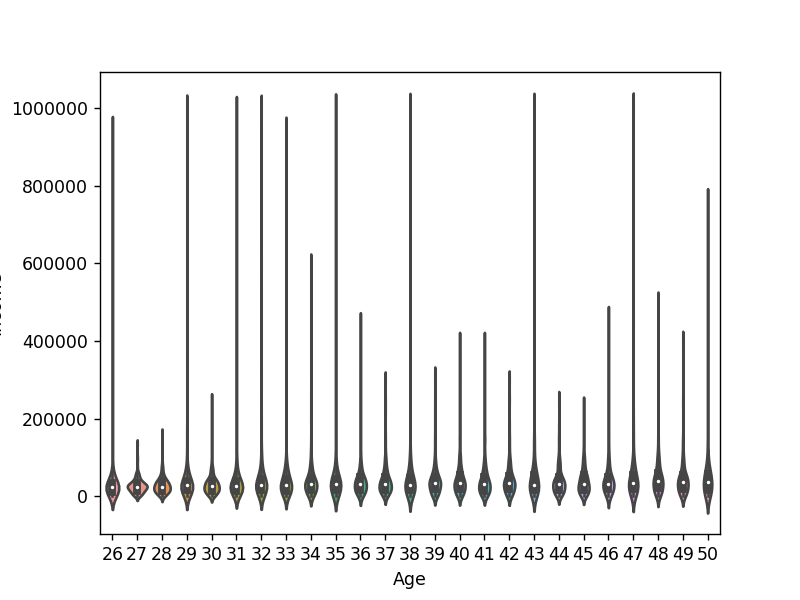

Text(0, 0.5, 'Income')

In [25]:
fig = plt.figure()

#code for violin chart
sns.violinplot(x='AGE', y='S1Q10A', data=sub2)
plt.xlabel('Age')
plt.ylabel('Income')

# Draw a HeatMap for Ethnicity and Carton of Beer consumed per month, based on depedency on beer

# Rename Race - From Module 4

In [19]:
# you can rename categorical variable values for graphing if original values are not informative 
# first change the variable format to categorical if you haven’t already done so
sub2['ETHRACE2A'] = sub2['ETHRACE2A'].astype('category')

sub2['ETHRACE2A']=sub2['ETHRACE2A'].cat.rename_categories(["White", "Black", "NatAm", "Asian", "Hispanic"])

# Create a new variable CARTON_ADAY using CARTON_ADAY function provided

In [26]:
def CARTON_ADAY (row):
   if row['BEER_FEQMO'] >= 30 :
      return 1
   elif row['BEER_FEQMO'] < 30 :
      return 0
    
sub2['CARTON_ADAY'] = sub2.apply (lambda row: CARTON_ADAY (row),axis=1)
    

# Print the size of CARTON_ADAY, grouped by category

In [27]:
c4= sub2.groupby('CARTON_ADAY').size()
print(c4)

CARTON_ADAY
0.000000    6897
1.000000     417
dtype: int64


# Draw bar chart to show relationship between race (ETHRACE2A) and CARTON_ADAY

<IPython.core.display.Javascript object>


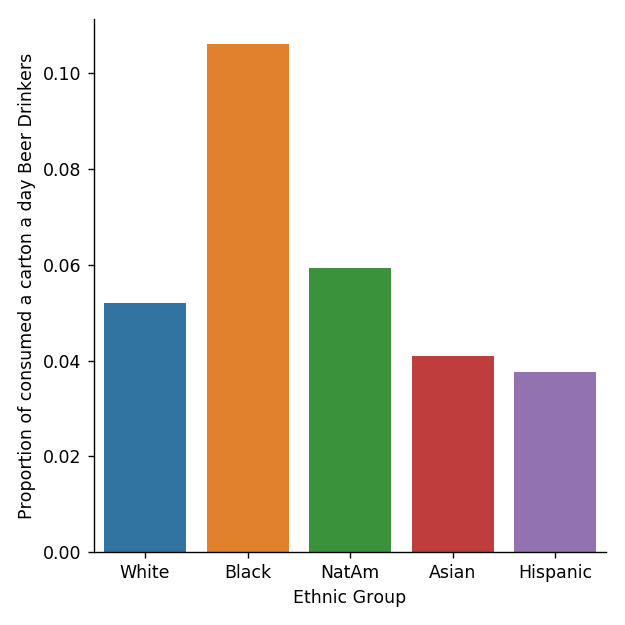

Text(0.6944444444444446, 0.5, 'Proportion of consumed a carton a day Beer Drinkers')

In [29]:
# bivariate bar graph C->C
%matplotlib notebook

#code for bar chart
sns.catplot(x='ETHRACE2A', y='CARTON_ADAY', data=sub2, kind="bar", ci=None)
plt.xlabel('Ethnic Group')
plt.ylabel('Proportion of consumed a carton a day Beer Drinkers')

# Make copy of just race (ETHRACE2A) and CARTON_ADAY

In [30]:
sub3 = sub2[['ETHRACE2A','CARTON_ADAY']].copy()
sub3.head()

,ETHRACE2A,CARTON_ADAY
1,Hispanic,nan
8,White,nan
12,Asian,0.000000
16,White,nan
24,Hispanic,nan


# Create pivot table of race (ETHRACE2A) and CARTON_ADAY

In [31]:
table = pd.pivot_table(sub3, index=['ETHRACE2A'], columns=['CARTON_ADAY'], aggfunc=np.size)

print(table)

CARTON_ADAY  0.000000  1.000000
ETHRACE2A                      
White            8312       456
Black            1972       234
NatAm             222        14
Asian             374        16
Hispanic         2914       114


# Draw heat map

<IPython.core.display.Javascript object>


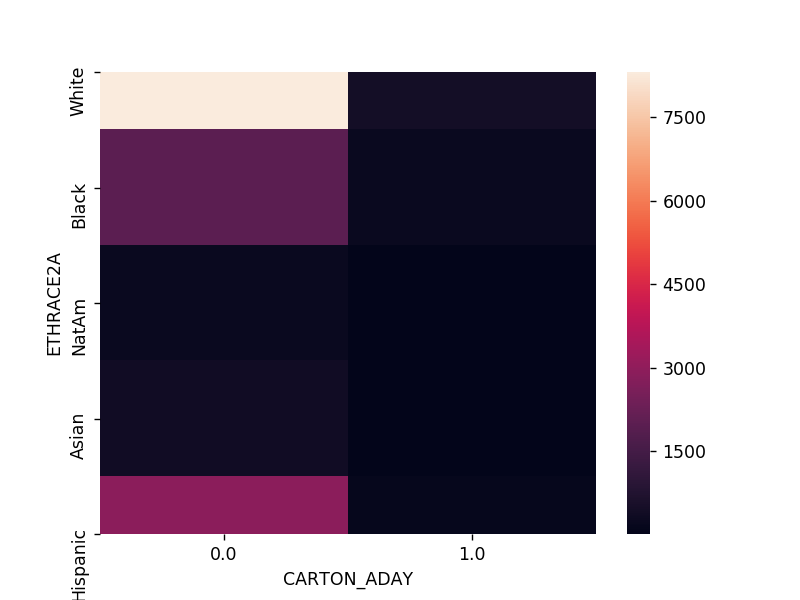

In [32]:
fig = plt.figure()

sns.heatmap(table)
# code for heat map

# Draw a bubble Chart

# Read in gapminder.csv

In [33]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

gapminder = pd.read_csv('gapminder.csv', low_memory=False)
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


# Convert internetuserate, urbanrate and incomeperperson to numeric 

In [34]:
gapminder['internetuserate'] = pd.to_numeric(gapminder['internetuserate'],errors='coerce')
gapminder['urbanrate'] = pd.to_numeric(gapminder['urbanrate'],errors='coerce')
gapminder['incomeperperson'] = pd.to_numeric(gapminder['incomeperperson'],errors='coerce')

In [35]:
gapminder_clean=gapminder.dropna()

# Draw a bubble Chart
# x = urbanrate
# y = income per person
# bubble size = internetuserate

<IPython.core.display.Javascript object>


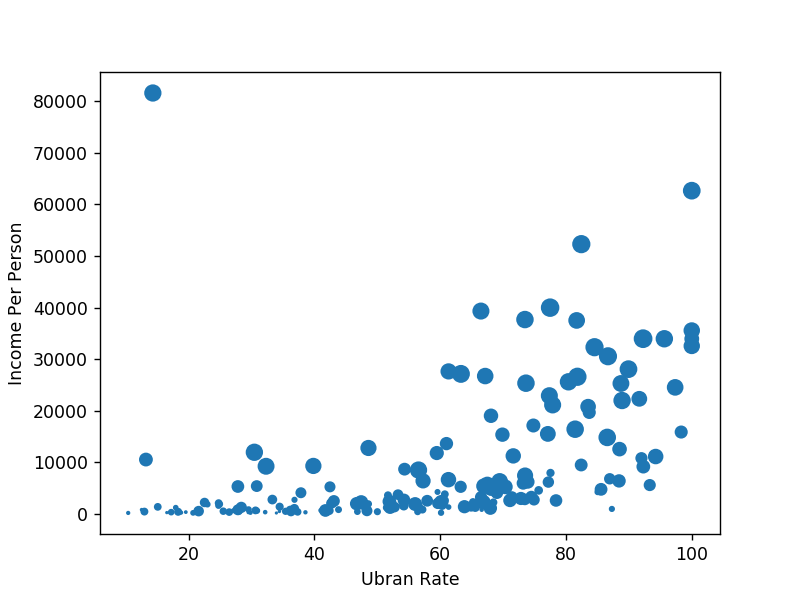

Text(0, 0.5, 'Income Per Person')

In [36]:
%matplotlib notebook
fig = plt.figure()

#bubble plot code
plt.scatter(gapminder_clean['urbanrate'],gapminder_clean['incomeperperson'], s=gapminder_clean['internetuserate']) 

plt.xlabel('Ubran Rate')
plt.ylabel('Income Per Person')